## <strong> Importation des modules </strong>

In [1]:
%pylab inline
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import random

#########################################

import seaborn as sns
#%matplotlib inline
#%matplotlib notebook
sns.set()

#########################################

import import_ipynb
from P5_01_Mes_fonctions import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
importing Jupyter notebook from P5_01_Mes_fonctions.ipynb


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## <strong> A - Importation des données </strong>

In [2]:
data = pd.read_csv("data_merge.csv")
data_mod = pd.read_csv("data_mod.csv")

if "Unnamed: 0" in data.columns : data.drop( ["Unnamed: 0"] , axis = 1 , inplace=True)
if "Unnamed: 0" in data_mod.columns : data_mod.drop( ["Unnamed: 0"] , axis = 1 , inplace=True)

In [3]:
data.shape

(99989, 17)

In [4]:
data_mod.shape

(90018, 13)

In [5]:
data.head()

,order_id,date_achat_client,Nbr_mode_de_paiement,payment_type,payment_value,review_score,customer_unique_id,customer_city,order_items_quantity,items_mean_price,product_category_name,product_photos_qty,product_volume_litre,seller_city,distance_client_vendeur_Km,durée_reception_cmd_jr,durée_reception_respectée_jr
0,2e7a8482f6fb09756ca50c10d7bfc047,-26.114363,1.0,credit_card,136.23,1.0,b7d76e111c89f7ebf14761390f0f7d17,boa vista,3.0,36.445,furniture_decor,2.0,5.376,monte siao,2828.774821,NaN,NaN
1,e5fa5a7210941f7d56d0208e4e071d35,-25.989190,1.0,credit_card,75.06,1.0,4854e9b3feff728c13ee5fc7d1547e92,passo fundo,1.0,59.500,telephony,1.0,1.250,curitiba,345.147657,NaN,NaN
2,809a282bbd5dbcabb6f2f724fca862ec,-17.358113,1.0,credit_card,40.95,1.0,009b0127b727ab0ba422f6d9604487c7,sao jose dos campos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bfbd0f9bdef84302105ad712db648a6c,-15.488449,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,6.0,44.990,health_beauty,1.0,4.096,curitiba,551.529866,54.813194,36.324745
4,71303d7e93b399f5bcd537d124c0bcfa,1.922130,1.0,credit_card,109.34,1.0,0eb1ee9dba87f5b36b4613a65074337c,sao paulo,1.0,100.000,baby,1.0,5.832,sao paulo,10.519797,NaN,NaN


In [6]:
data_mod.head()

,Jour_moyen_entre_achats,Nombre_commandes,Nbr_mode_de_paiement,payment_value,review_score,order_items_quantity,items_mean_price,distance_client_vendeur_Km,durée_reception_cmd_jr,durée_reception_respectée_jr,payment_type,customer_city,seller_city
0,0.0,1,1.0,141.90,5.0,1.0,129.90,77.693891,6.411227,-4.132905,credit_card,cajamar,piracicaba
1,0.0,1,1.0,27.19,4.0,1.0,18.90,12.543108,3.285590,-4.248125,credit_card,osasco,sao paulo
2,0.0,1,1.0,86.22,3.0,1.0,69.00,490.603272,25.731759,-1.389734,credit_card,sao jose,campo limpo paulista
3,0.0,1,1.0,43.62,4.0,1.0,25.99,2474.833460,20.037083,-11.108970,credit_card,belem,sao paulo
4,0.0,1,1.0,196.89,5.0,1.0,180.00,69.779397,13.141134,-7.035463,credit_card,sorocaba,jacarei


## <strong> A -  Répartition des différents modes de paiments des clients </strong> pour chaque commande

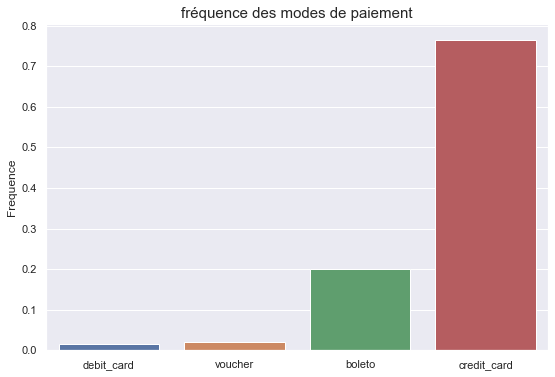

In [7]:
base = data["payment_type"].value_counts(ascending=True, normalize=True)
plt.figure(figsize=(9,6))
sns.barplot( x = base.index, y = base.values,orient="v")
plt.ylabel("Frequence")
plt.title("fréquence des modes de paiement", size=15)
plt.show()

### <strong> A.2- </strong> Répartition parmi les première villes 

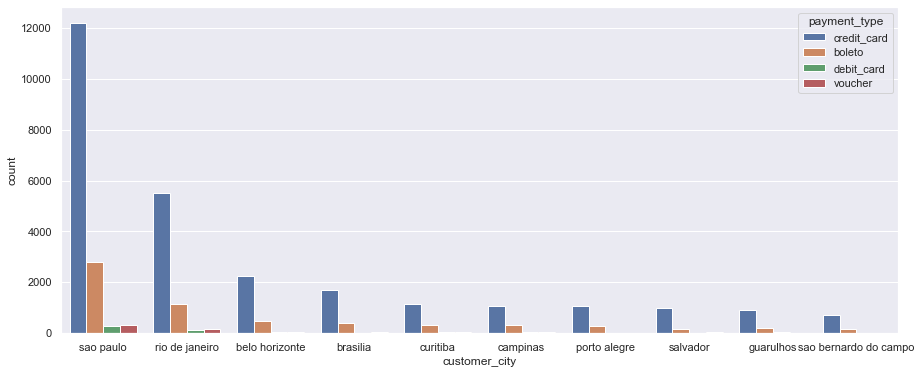

In [8]:
plt.figure( figsize=(15,6) )
sns.countplot( x = "customer_city", hue = "payment_type" , data = data , order= data["customer_city"].value_counts().index[:10]) 
plt.show()

La majorité des achats au brésil se règlent en carte de crédit dans toutes les villes du Brésil

### <strong> A.2- </strong> Répartition du montant total des achat par commande en fonction du mode de paiement

Le montant total des achat comprends les frais de livraison 

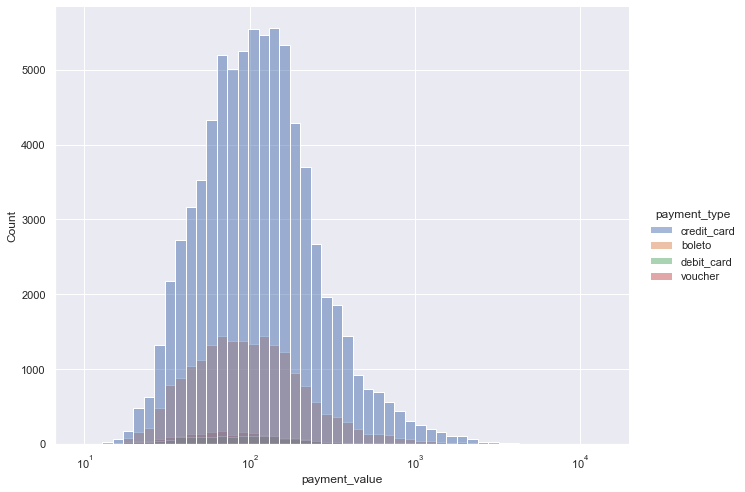

In [9]:
sns.displot(data, x = "payment_value", hue="payment_type",log_scale=True ,bins=50,  height= 7, aspect=1.3, kind ="hist")   #  kind : {"hist", "kde", "ecdf"}
plt.show()

On peut voire que pour des achats élevés les cartes bancaire représentent le moyen de paiement par excéllence des client.

### <strong> A.3- </strong> Moyennes et volume des achats pour chaque moyens de paiement

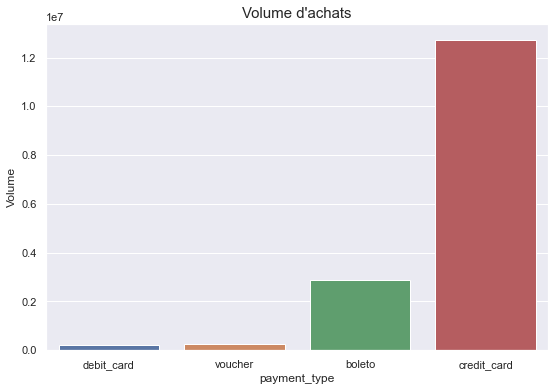

In [10]:
plt.figure(figsize=(9,6))
base = data.groupby(by="payment_type", dropna=True, as_index=False).sum()
sns.barplot (x = base["payment_type"] , y=base["payment_value"] , order=base.sort_values("payment_value", ascending=True)["payment_type"])
plt.title("Volume d'achats", size=15)
plt.ylabel("Volume")
plt.show()

In [11]:
data.groupby(["customer_city" ,"payment_type"], as_index=False).agg({"payment_value":"sum"})

,customer_city,payment_type,payment_value
0,abadia dos dourados,boleto,58.28
1,abadia dos dourados,credit_card,355.22
2,abadiania,credit_card,1025.52
3,abaete,boleto,492.51
4,abaete,credit_card,1454.30
...,...,...,...
7155,zacarias,credit_card,229.85
7156,ze doca,boleto,66.51
7157,ze doca,credit_card,404.37
7158,ze doca,voucher,408.04


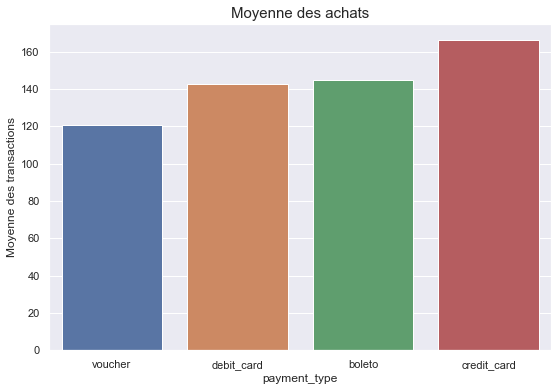

In [12]:
plt.figure(figsize=(9,6))
base = data.groupby(by="payment_type", dropna=True,as_index=False).mean()
sns.barplot (x = base["payment_type"] , y=base["payment_value"] , order=base.sort_values("payment_value", ascending=True)["payment_type"])
plt.title("Moyenne des achats", size=15)
plt.ylabel("Moyenne des transactions")
plt.show()

Les cartes de credit concentre les plus gros volume de transaction pour le règlement des commandes par les clients

### <strong> A.4- </strong> Volume d'achat par moyen de paiment dans les 10 plus grandes villes ( volume de commandes )

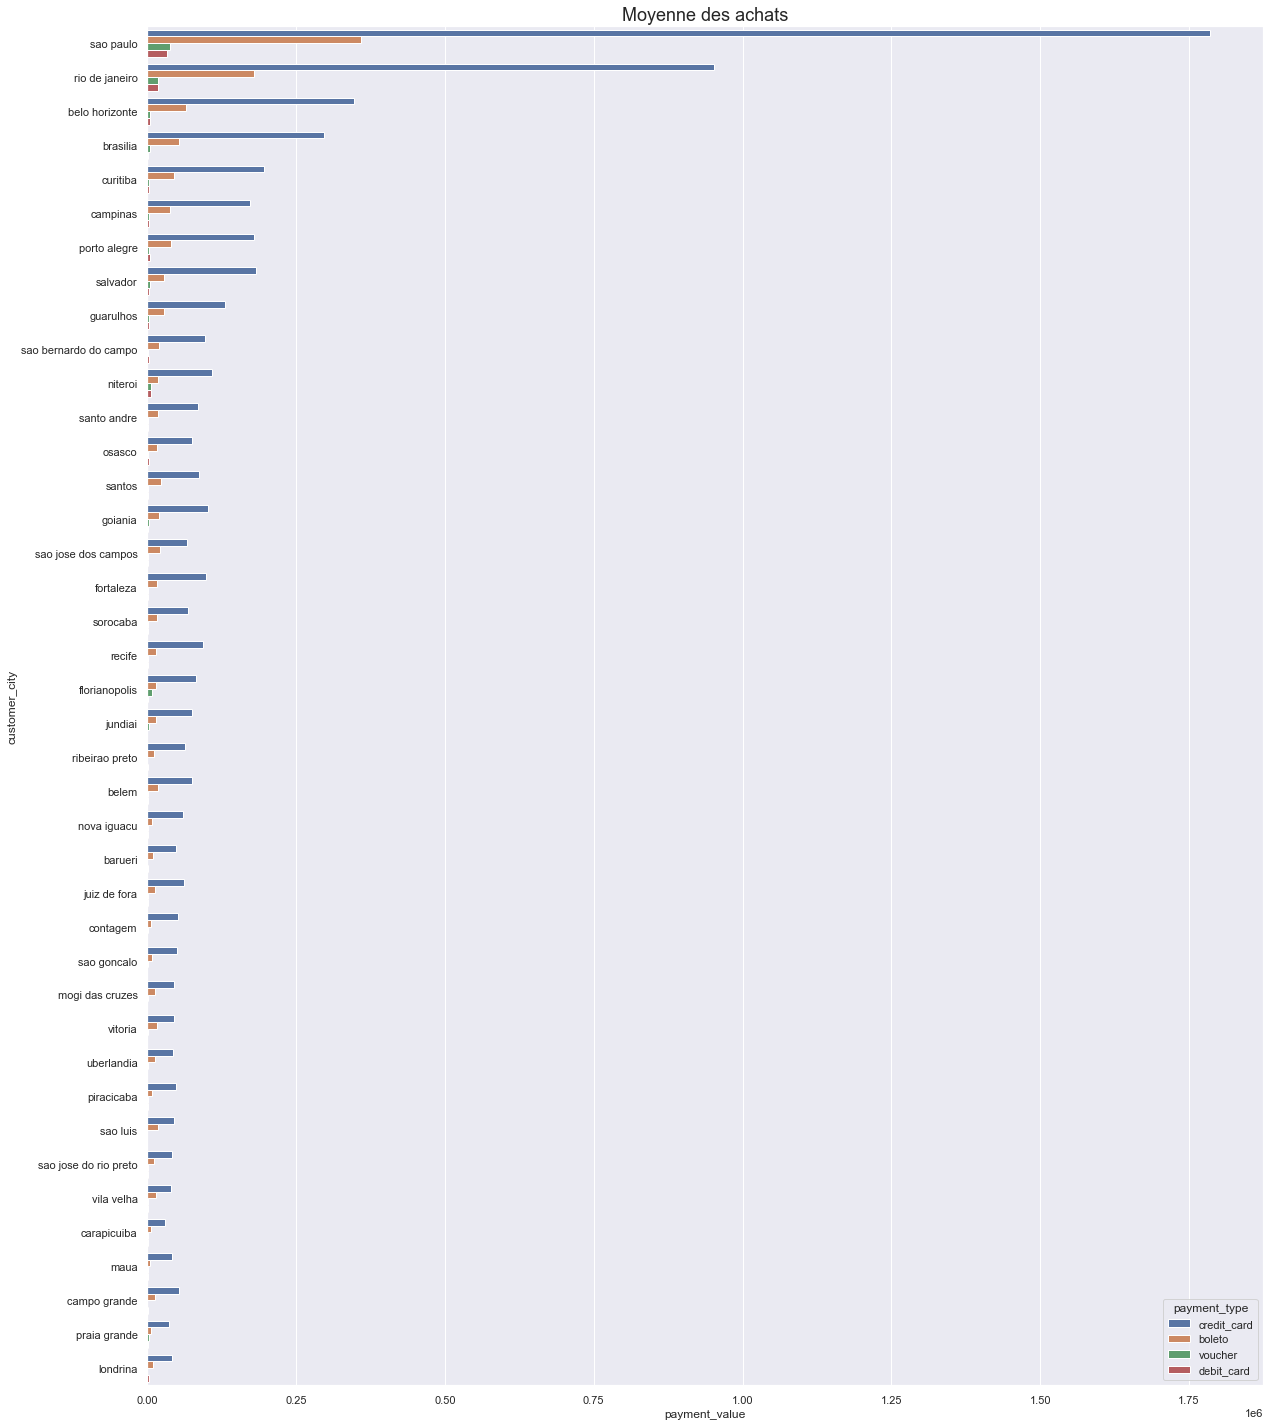

In [13]:
plt.figure(figsize=(20,25))
base = data.groupby(["customer_city" ,"payment_type"], as_index=False).agg({"payment_value":"sum"})
sns.barplot (y = base["customer_city"] , x=base["payment_value"] , hue="payment_type",data = base,
             order=data["customer_city"].value_counts().index[:40] , hue_order=base["payment_type"].value_counts(ascending=False,).index[:4] )
plt.title("Moyenne des achats", size=18)
plt.show()

Ainsi la carte de crédit enrégistre le plus fort volume de transaction pour le paiment des commandes dans les 40 premières villes du Brésil en terme de volume de commande.

## <strong> B - Répartition des departs de commandes par villes et Etats du Brésil  </strong> 

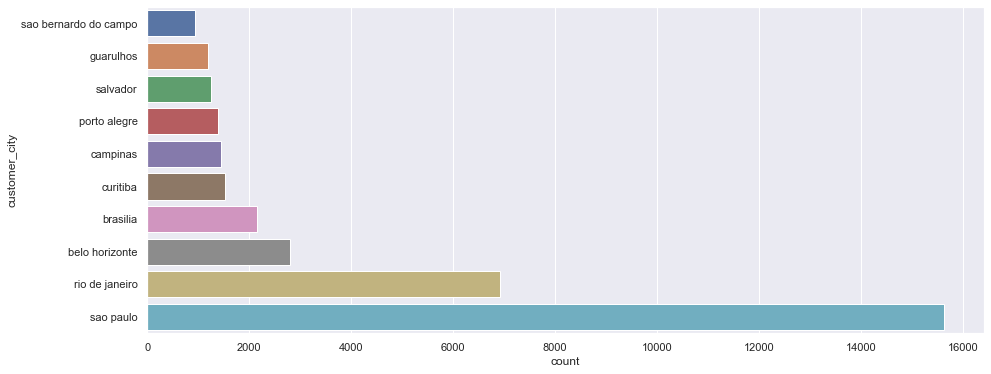

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(y="customer_city",order= data["customer_city"].value_counts(ascending=True).index[-10:], data = data)
plt.show()

Comme on peut le voire, la ville de Sao Paulo est la ville qui concentre le plus grand nombre d'acheteurs au Bresil. Ensuite vient Rio de janeiro en seconde position

### <strong> B.1 - </strong> Répartition des villes des vendeurs

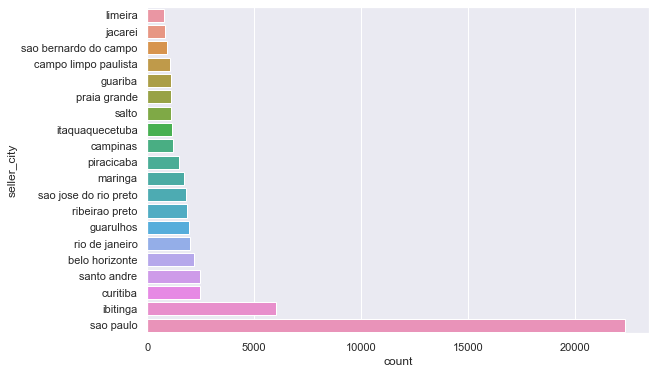

In [15]:
plt.figure(figsize=(9,6))
sns.countplot(y="seller_city",order= data_mod["seller_city"].value_counts(ascending=True).index[-20:], data = data_mod)
plt.show()

## <strong> C -  Répartition de la distance client vendeur  </strong>

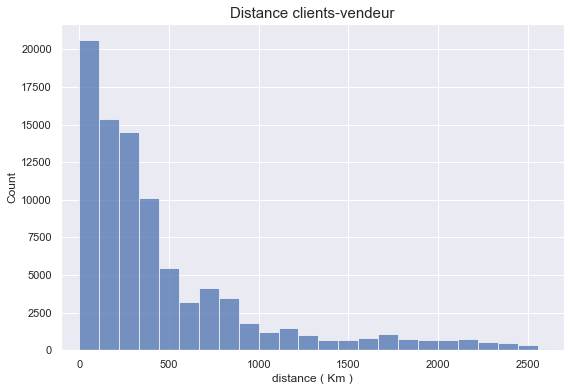

In [16]:
plt.figure(figsize=(9,6))
sns.histplot(data_mod , x = "distance_client_vendeur_Km",bins=70)
plt.title("Distance clients-vendeur", size = 15)
plt.xlabel("distance ( Km )")
plt.xlim([-100,2700])
plt.show()

On peut constater que les clients ont plus tendance à commander des produits auprès de vendeurs qui sont proches de chez eux.

Encore plus des vendeurs qui sont dans la même ville qu'eux

## <strong> D - Distribution de la durée de reception des commandes  </strong>

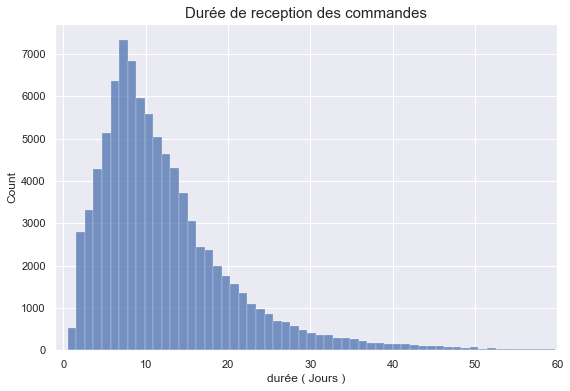

In [17]:
plt.figure(figsize=(9,6))
sns.histplot(data_mod ,  x="durée_reception_cmd_jr",bins=200)
plt.xlim([-1,60])
plt.title("Durée de reception des commandes", size=15)
plt.xlabel( "durée ( Jours )" )
plt.show()

In [18]:
data["durée_reception_cmd_jr"].mean()

12.564536767028933

### <strong> D.1 -  </strong>   Facteur d'influence de la distance sur la durée de reception de la commande

In [19]:
n =20
A = pd.DataFrame( {"durée" : pd.qcut(data["durée_reception_cmd_jr"],n) ,"distance" : pd.qcut(data["distance_client_vendeur_Km"],n) } )

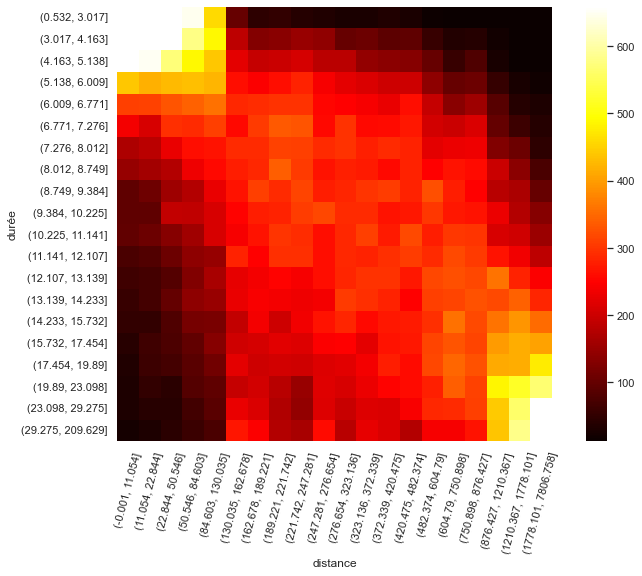

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap( pd.crosstab(A["durée"], A["distance"]) , cmap = "hot" , annot = False, robust=True , square=True )
plt.xticks(rotation=75)
plt.show()

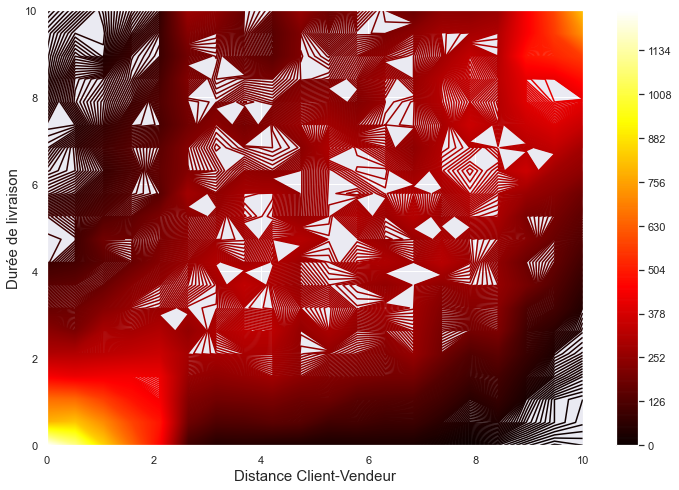

In [21]:
X , Y = np.meshgrid(np.linspace(0,10,n),np.linspace(0,10,n))

plt.figure(figsize=(12,8))
plt.contour(X,Y, pd.crosstab(A["durée"], A["distance"]), 1000 ,cmap="hot")
plt.colorbar()
plt.xlabel("Distance Client-Vendeur", size=15)
plt.ylabel("Durée de livraison", size=15)
plt.show()

## <strong> E - Retard de livraison des commandes </strong>

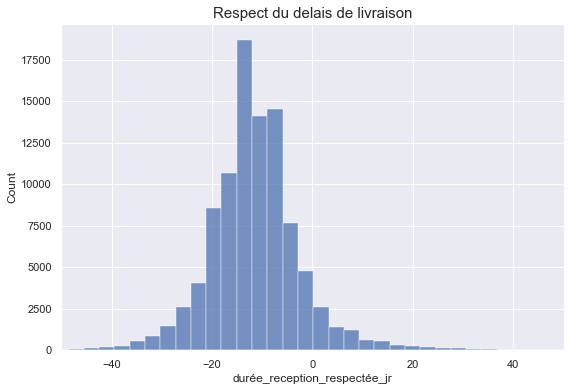

In [22]:
plt.figure(figsize=(9,6))
sns.histplot(data ,  x="durée_reception_respectée_jr",bins=110)
plt.xlim([-50,50])
plt.title("Respect du delais de livraison", size=15)

plt.show()

<strong> Interprétation : </strong>  <p> - Les valeurs négatives indiquents les commandes ayant étées livrées à l'acheteur avant la date de livraison estimée par le site ogistique de la plateforme; </p> <p> - Les valeurs positives quand à elles indique les commandes ayant accusées un retard sur la date de livraison prévue, l'intensité informant sur le nombre de jours d'avance de livraison sur la date de livraison prévue. </p>

On conclu donc que dans l'ensemble des commandes sont livrées dans les delais aux clients avec un faible pourcentage de retard de livraison des commandes

### <strong> E.1 - </strong> Proportion des retards de commandes

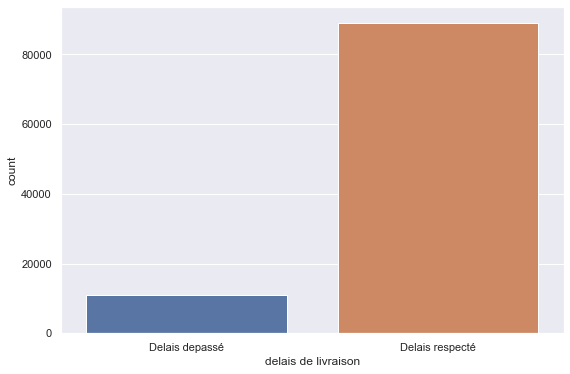

In [23]:
plt.figure(figsize=(9,6))
sns.countplot(x = "delais de livraison" , data = pd.DataFrame({"delais de livraison":np.where(data["durée_reception_respectée_jr"] <= 0 , "Delais respecté","Delais depassé")}) , )
plt.show()

## <strong> F - Distribution des montants des commandes  </strong>

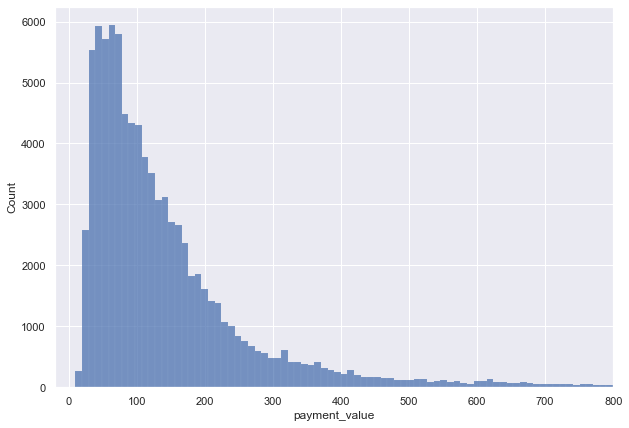

In [24]:
plt.figure(figsize=(10,7))
sns.histplot(data_mod ,  x="payment_value",  bins=1400)
plt.xlim([-20,800])
plt.show()

In [25]:
data_mod["payment_value"].skew()

9.694971673141513

## <strong> F.1 - </strong> Distribution des formes et moyennes des histogrammes pour chaque ville

In [26]:
skewness = []
moyenne = []
for ville in data["customer_city"].unique() :
    skewness.append( data[ data["customer_city"]== ville ]["payment_value"].skew() )
    moyenne.append( data[ data["customer_city"]== ville ]["payment_value"].mean() )

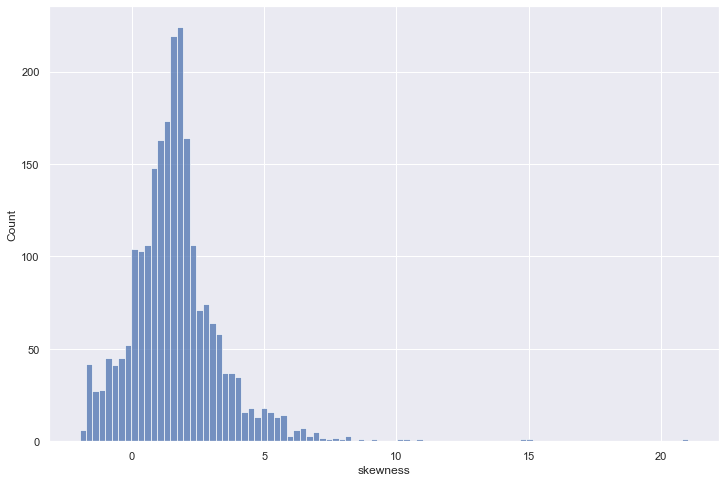

In [27]:
plt.figure( figsize = (12,8) )
sns.histplot(pd.DataFrame({"skewness" :skewness}) , x = "skewness" )
plt.show()

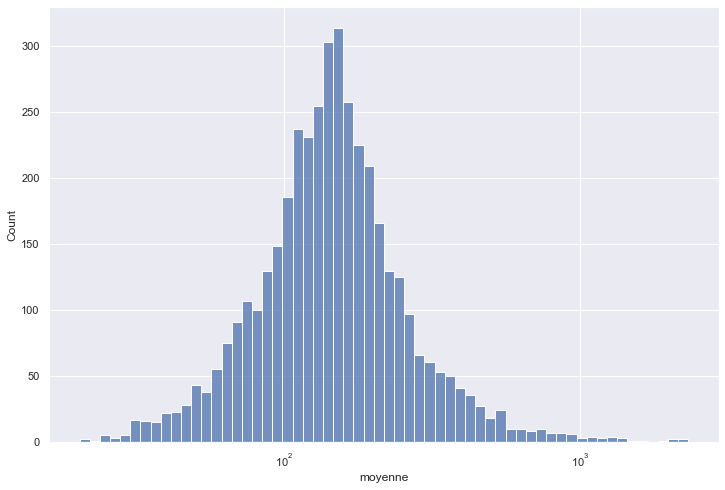

In [28]:
plt.figure(figsize = (12,8))
sns.histplot(pd.DataFrame({"moyenne" :moyenne}) , x = "moyenne" , log_scale=True)
plt.show()

## <strong> G - Repartition des notes de clients </strong>

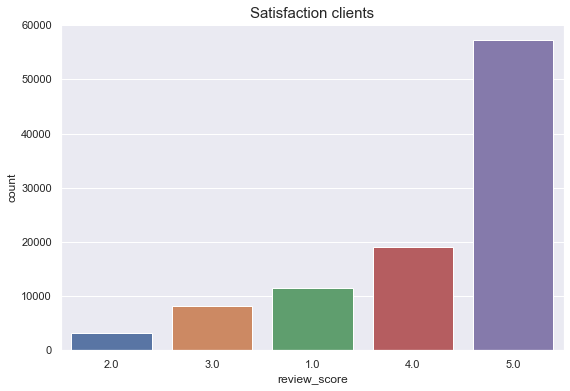

In [29]:
plt.figure(figsize=(9,6))
sns.countplot(x = "review_score" , data = data , order= data["review_score"].value_counts(ascending=True).index)
plt.title("Satisfaction clients" , size=15 )
plt.show()

Les vendeurs ont généralement des notes plutot bonnes.

### <strong> G.1 - </strong> Influences sur la note du client

In [30]:
data[["review_score","durée_reception_respectée_jr"]].corr()

,review_score,durée_reception_respectée_jr
review_score,1.000000,-0.266414
durée_reception_respectée_jr,-0.266414,1.000000


### G. 1. 1 - Influence du delais de livraison

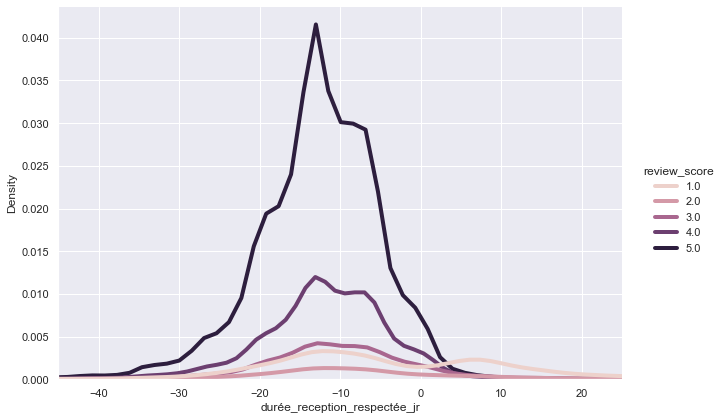

In [31]:
sns.displot(data, x ="durée_reception_respectée_jr" , hue="review_score", kind="kde" , lw = 4, height= 6 , aspect=1.5 )
plt.xlim(-45,25)
plt.show()

On remarque que :

- Les commandes ayant étées livrées  dans les delais obtiennent les meilleurs notes (5,4)

- Les commandes livrées après les delais obtiennet les mauvaises notes des clients.

Observation en accord avec la correlation négtive entre les deux variables.

### G. 1. 2 - Influence de la durée de livraison des commandes

In [32]:
data[["review_score","durée_reception_cmd_jr"]].corr()

,review_score,durée_reception_cmd_jr
review_score,1.000000,-0.333804
durée_reception_cmd_jr,-0.333804,1.000000


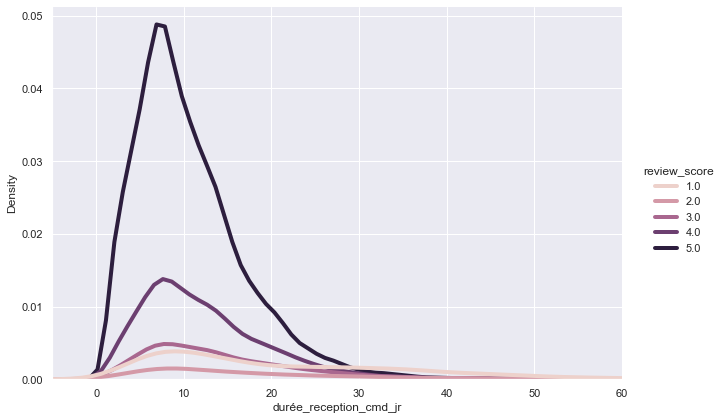

In [33]:
sns.displot(data, x ="durée_reception_cmd_jr" , hue="review_score", kind="kde" , lw = 4, height= 6 , aspect=1.5, log_scale=False )
plt.xlim(-5,60)
plt.show()

On observe que les commandes ayant des delais de livraison courts (au plus 20 jours ) obtiennent généralement plus de meilleurs notes que les commandes délivrées à plus de 25 jours  qui obtiennent majoritairement les pires notes.

### G. 1. 3 - Influence du prix

In [34]:
data[["review_score","payment_value"]].corr()

,review_score,payment_value
review_score,1.000000,-0.049113
payment_value,-0.049113,1.000000


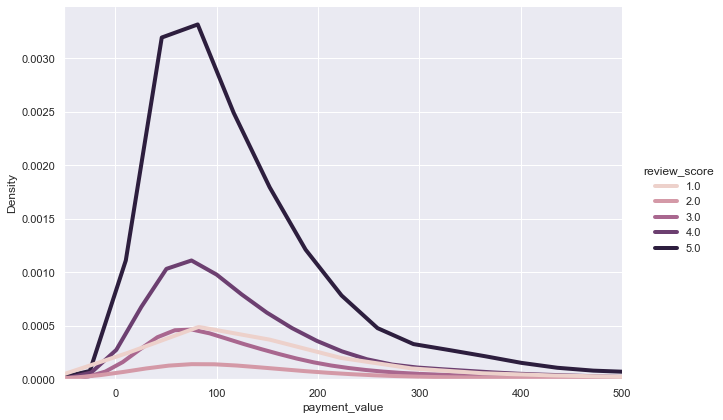

In [35]:
sns.displot(data, x ="payment_value" , hue="review_score", kind="kde" , lw = 4, height= 6 , aspect=1.5 )
plt.xlim(-50,500)
plt.show()

### G. 1. 3 - Influence de la distance au vendeur

In [36]:
data[["review_score","distance_client_vendeur_Km"]].corr()

,review_score,distance_client_vendeur_Km
review_score,1.000000,-0.048317
distance_client_vendeur_Km,-0.048317,1.000000


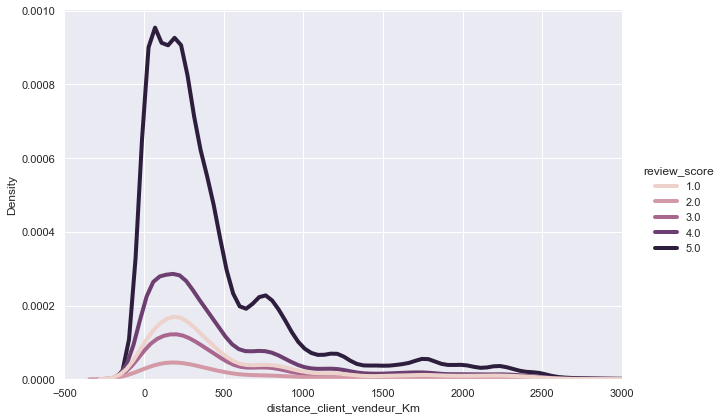

In [37]:
sns.displot(data, x ="distance_client_vendeur_Km" , hue="review_score", kind="kde" , lw = 4, height= 6 , aspect=1.5 )
plt.xlim(-500,3000)
plt.show()

Pas d'influence

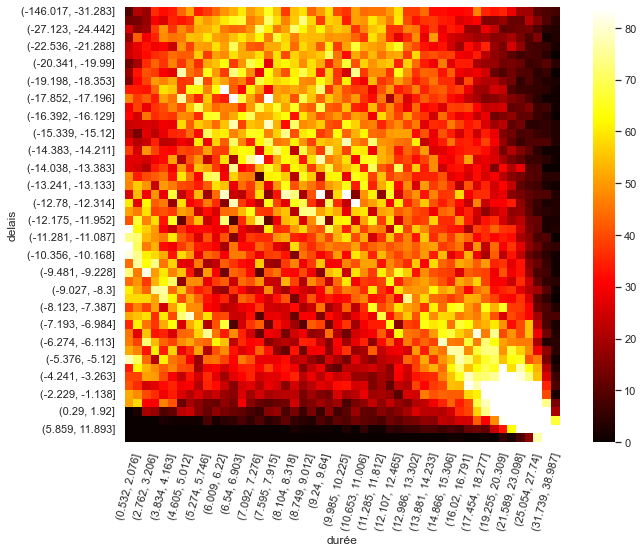

In [38]:
n = 50
A = pd.DataFrame({"delais" : pd.qcut(data["durée_reception_respectée_jr"] , n), "durée" : pd.qcut(data["durée_reception_cmd_jr"] , n), "notes" : data["review_score"]})
pd.crosstab(A["delais"],A["durée"])


plt.figure(figsize=(12,8))
sns.heatmap( pd.crosstab(A["delais"],A["durée"]) , cmap = "hot" , annot = False, robust=True , square=True )
plt.xticks(rotation=75)
plt.show()

## <strong> H - Distribution du nombre de commandes des clients </strong>

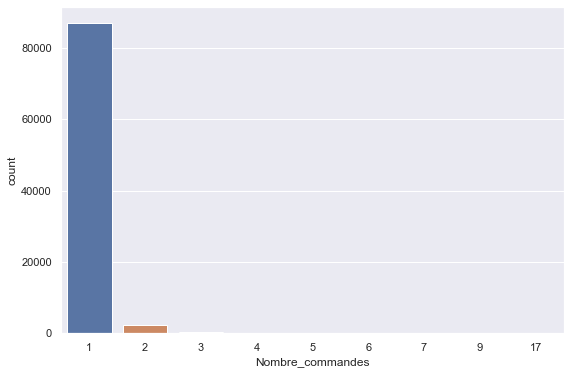

In [39]:
plt.figure( figsize=(9,6) )
sns.countplot( x = "Nombre_commandes" , data = data_mod , order= data_mod["Nombre_commandes"].value_counts(ascending=False).index ) 
plt.show()

In [40]:
a = data_mod["Nombre_commandes"].value_counts(normalize=True)*100
pd.DataFrame({ "Nombre d'achats" : a.index , "frequence (%)" : a.values })

,Nombre d'achats,frequence (%)
0,1,96.660668
1,2,2.721678
2,3,0.435468
3,4,0.134418
4,5,0.025550
5,6,0.014442
6,7,0.005554
7,9,0.001111
8,17,0.001111


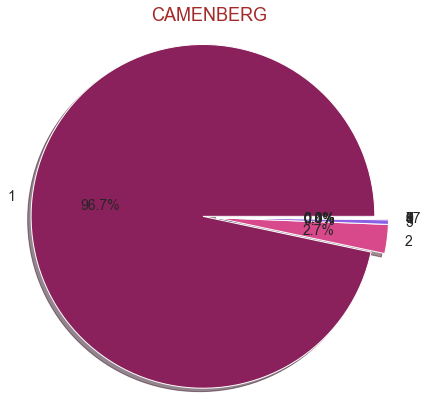

In [41]:
camemberg( data_mod["Nombre_commandes"].value_counts().index , data_mod["Nombre_commandes"].value_counts().values, figure_size=(7,7), rot = 0 )

La majorité des clients n'ont passés qu'une seule commande.